In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('fivethirtyeight')

In [24]:
df4=pd.read_csv('engineered_4yr.csv')

In [25]:
df4.head()

,id,name,completion_rate_4yr_150nt,size,part_time_share,cost,pell_grant_rate,federal_loan_rate,retention_rate_full_time,share_25_older,two_yr_default_rate,three_yr_default_rate,share_firstgeneration,median_hh_income,pt25,pell_twoyear,incost,pellsq,twoyrdsq
0,100654,Alabama A & M University,0.2749,0.046135,0.0877,0.148921,0.7039,0.7667,0.5769,0.0859,0.114,0.189,0.365828,0.154470,0.007533,0.080245,0.023004,0.495475,0.012996
1,100663,University of Alabama at Birmingham,0.5309,0.120437,0.2578,0.124837,0.3525,0.5179,0.8161,0.2363,0.060,0.057,0.341224,0.221132,0.060918,0.021150,0.027605,0.124256,0.003600
2,100690,Amridge University,0.2500,0.002910,0.5392,0.109216,0.6971,0.8436,0.0909,0.8571,0.071,0.112,0.512500,0.198391,0.462148,0.049494,0.021667,0.485948,0.005041
3,100706,University of Alabama in Huntsville,0.4867,0.063433,0.1746,0.157567,0.2949,0.4312,0.8255,0.2255,0.077,0.054,0.310132,0.253860,0.039372,0.022707,0.040000,0.086966,0.005929
4,100724,Alabama State University,0.2165,0.047015,0.0727,0.146269,0.7815,0.8113,0.6262,0.0974,0.132,0.194,0.343434,0.113963,0.007081,0.103158,0.016669,0.610742,0.017424


In [26]:
df4test=df4.sample(frac=.2,random_state=42)
df4train=df4.drop(df4test.index)

In [27]:
df4_corr = df4train.corr()['completion_rate_4yr_150nt'][3:]
features_list = df4_corr[abs(df4_corr) > 0.45].sort_values(ascending=False)
print("There are {} strongly correlated values with Completion Rate:\n{}".format(len(features_list), features_list))

There are 12 strongly correlated values with Completion Rate:
retention_rate_full_time    0.677183
incost                      0.585609
cost                        0.532081
median_hh_income            0.522637
twoyrdsq                   -0.488044
share_25_older             -0.538774
pellsq                     -0.554074
pell_twoyear               -0.575573
two_yr_default_rate        -0.595415
pell_grant_rate            -0.626920
share_firstgeneration      -0.644380
three_yr_default_rate      -0.659435
Name: completion_rate_4yr_150nt, dtype: float64


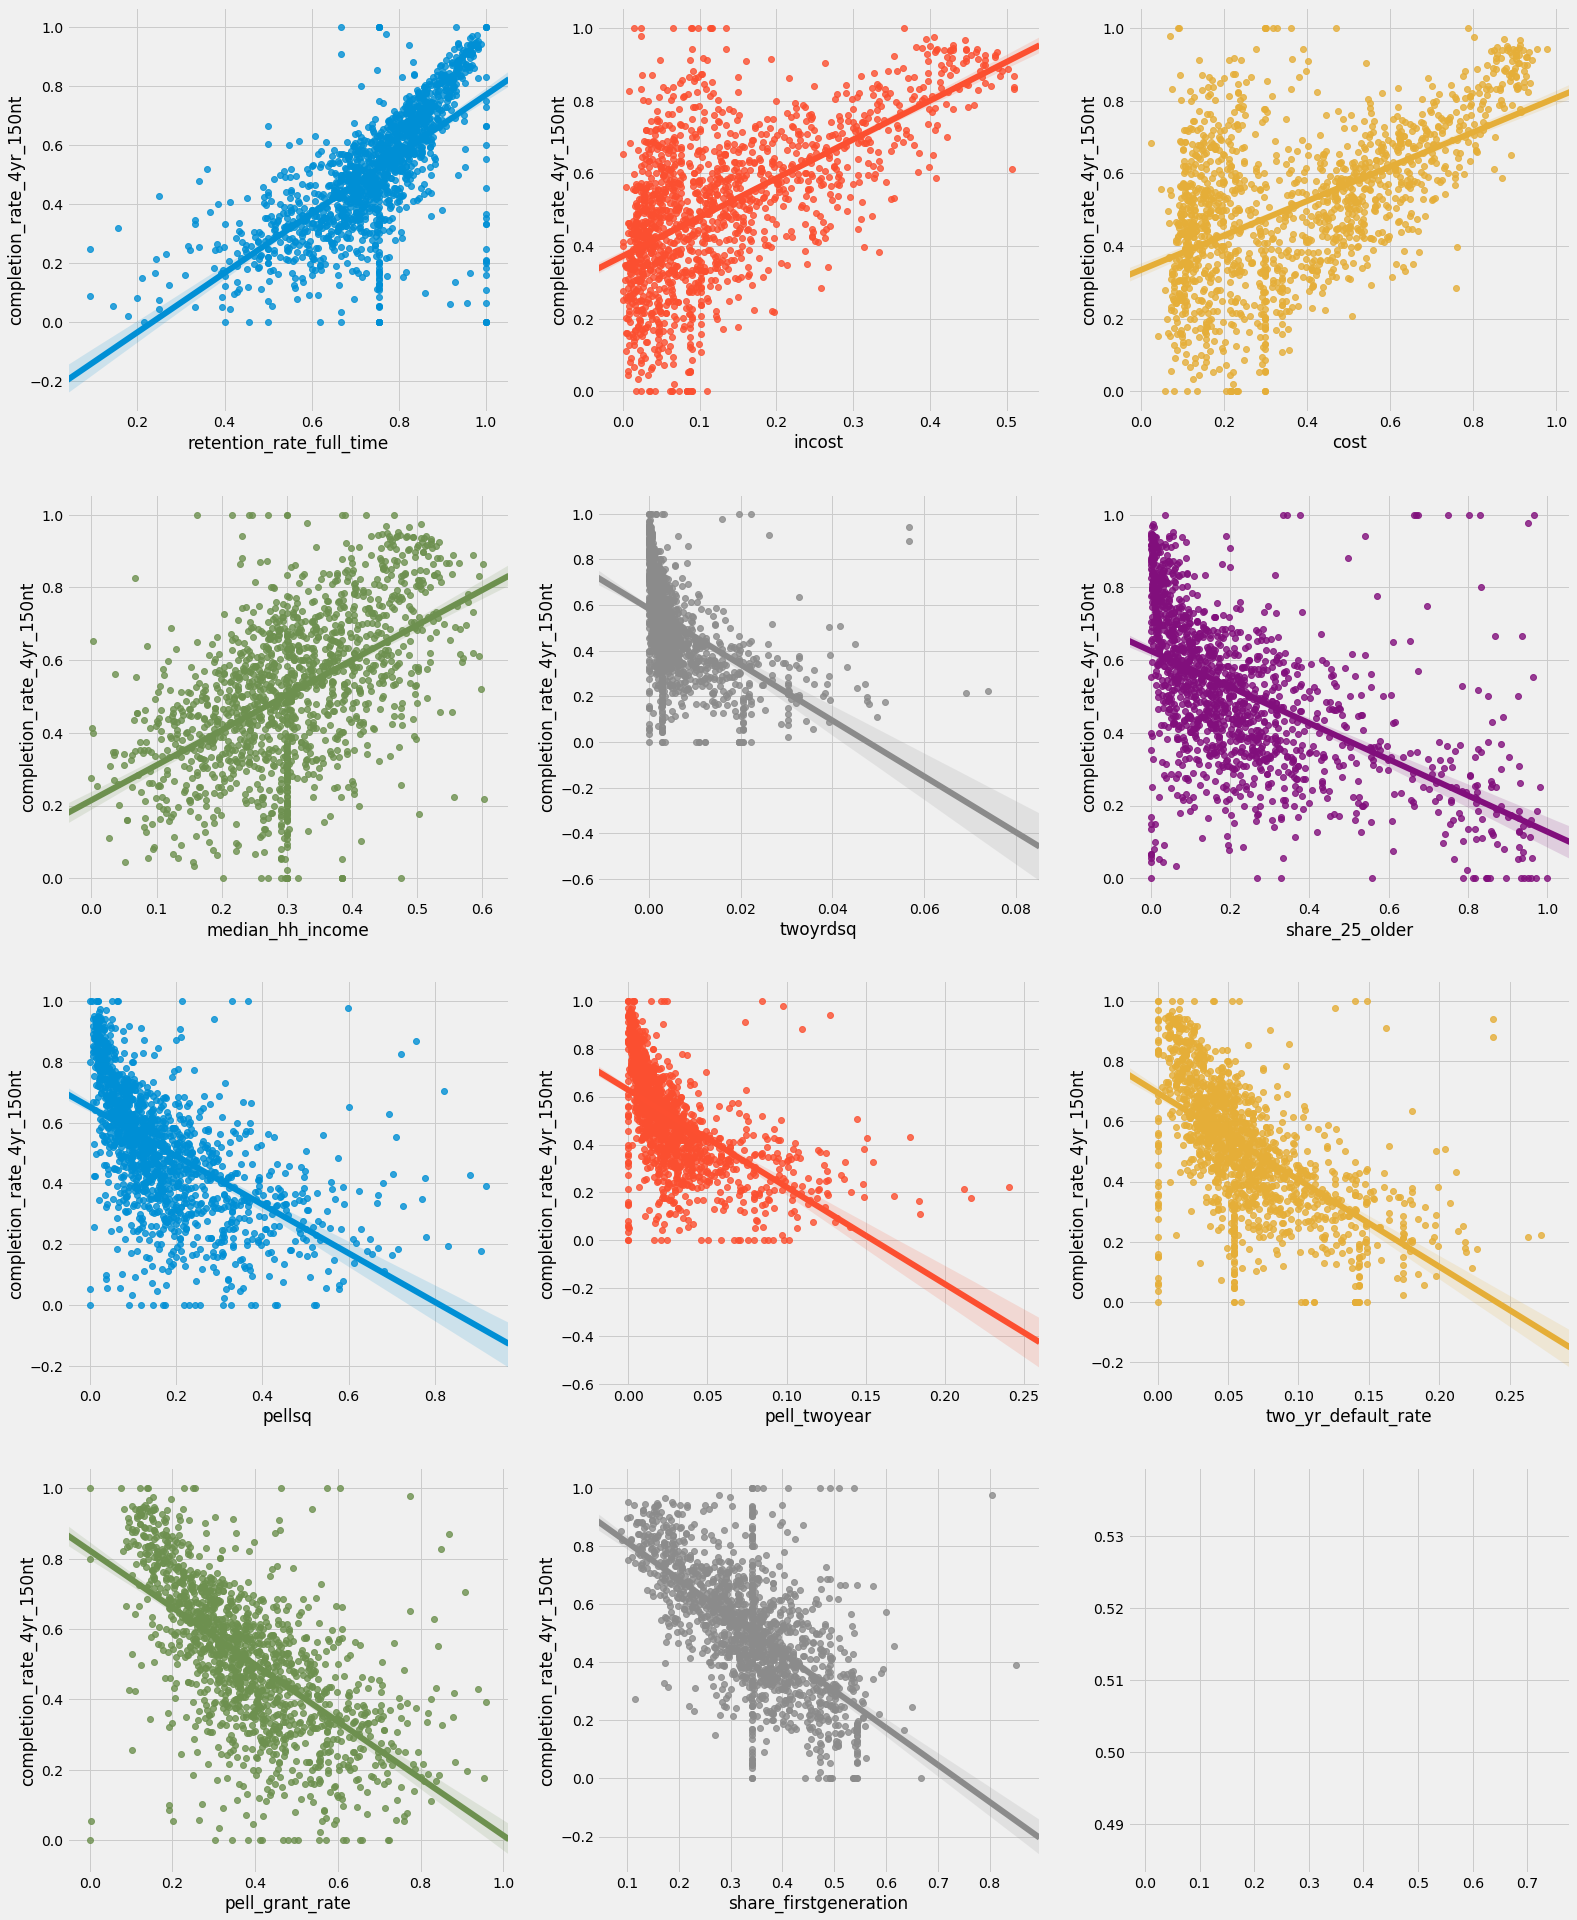

In [38]:
fig, ax = plt.subplots(round(len(features_list) / 3), 3, figsize = (24, 32))

for i, ax in enumerate(fig.axes):
    if i < len(features_list) - 1:
        sns.regplot(x=df4train[features_list.index[i]],y=Y, data=df4train[features_list.index], ax=ax)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using 

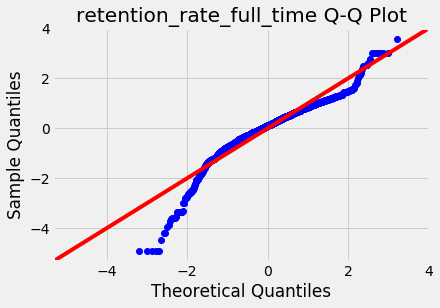

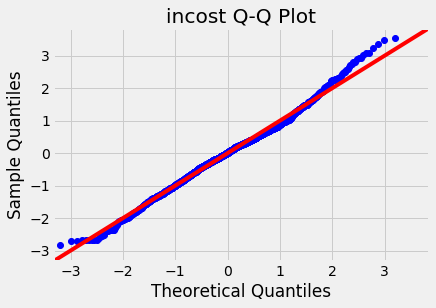

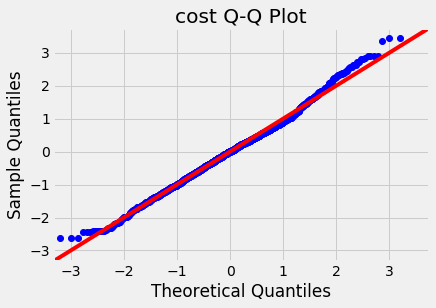

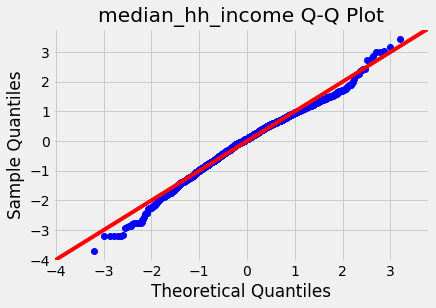

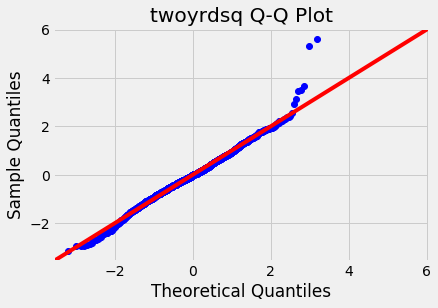

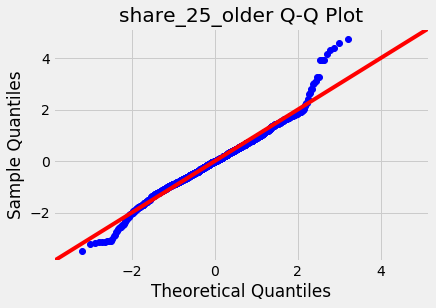

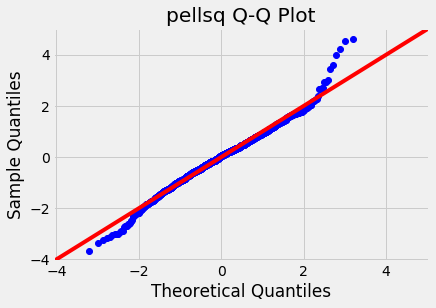

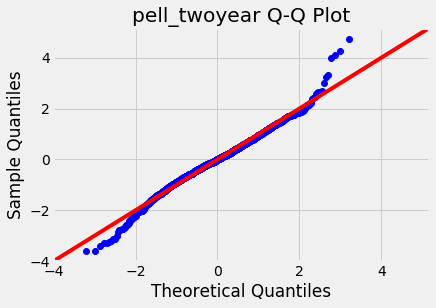

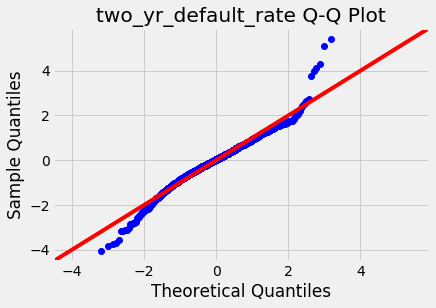

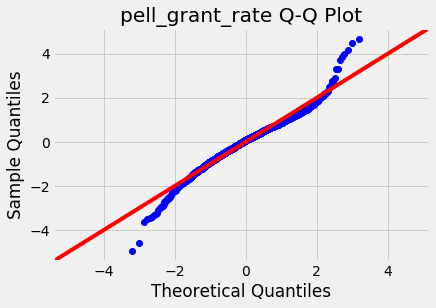

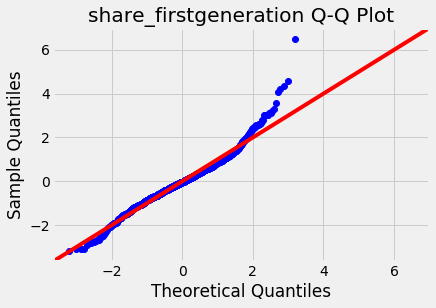

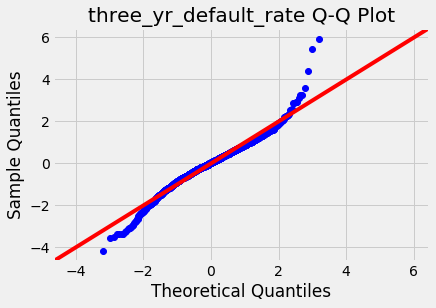

In [32]:
for label in features_list.index:
    f = f'completion_rate_4yr_150nt~{label}'
    model = smf.ols(formula=f, data=df4train).fit()

    resid1 = model.resid
    fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
    plt.title(f'{label} Q-Q Plot')
    fig.show();

In [42]:
features_list.drop('retention_rate_full_time',inplace=True)

In [41]:
features_list.drop('twoyrdsq',inplace=True)

KeyError: "['twoyrdsq'] not found in axis"

In [43]:
features_list.drop('pell_twoyear',inplace=True)

In [44]:
features_list

incost                   0.585609
cost                     0.532081
median_hh_income         0.522637
share_25_older          -0.538774
pellsq                  -0.554074
two_yr_default_rate     -0.595415
pell_grant_rate         -0.626920
share_firstgeneration   -0.644380
three_yr_default_rate   -0.659435
Name: completion_rate_4yr_150nt, dtype: float64

In [45]:
Y=df4train['completion_rate_4yr_150nt']
X=df4train[[x for x in features_list.index]]

In [47]:
f='completion_rate_4yr_150nt~cost+median_hh_income+pellsq+two_yr_default_rate+share_25_older+share_firstgeneration+pell_grant_rate+three_yr_default_rate+incost'
model=smf.ols(formula=f, data=df4train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     completion_rate_4yr_150nt   R-squared:                       0.642
Model:                                   OLS   Adj. R-squared:                  0.640
Method:                        Least Squares   F-statistic:                     287.7
Date:                       Thu, 07 Mar 2019   Prob (F-statistic):          1.44e-314
Time:                               19:51:19   Log-Likelihood:                 926.46
No. Observations:                       1454   AIC:                            -1833.
Df Residuals:                           1444   BIC:                            -1780.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.8091      0.028     28.596      0.000       0.754       0.865
cost                      0.1788      0.050      3.561      0.000       0.080       0.277
median_hh_income          0.3222      0.057      5.653      0.000       0.210       0.434
pellsq                    0.9384      0.099      9.465      0.000       0.744       1.133
two_yr_default_rate      -0.4349      0.124     -3.498      0.000      -0.679      -0.191
share_25_older           -0.1745      0.020     -8.808      0.000      -0.213      -0.136
share_firstgeneration    -0.1787      0.052     -3.422      0.001      -0.281      -0.076
pell_grant_rate          -1.0289      0.094    -10.925      0.000      -1.214      -0.844
three_yr_default_rate    -1.0306      0.120     -8.617      0.000      -1.265      -0.796
incost                   -0.2142      0.130     -1.642      0.101      -0.470       0.042
==============================================================================
Omnibus:                      228.905   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2753.633
Skew:                           0.306   Prob(JB):                         0.00
Kurtosis:                       9.714   Cond. No.                         60.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X=df4train[[x for x in features_list.index]]
f='completion_rate_4yr_150nt~cost+median_hh_income+pellsq+two_yr_default_rate+share_25_older+share_firstgeneration+pell_grant_rate+three_yr_default_rate'
model=smf.ols(formula=f, data=df4train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     completion_rate_4yr_150nt   R-squared:                       0.641
Model:                                   OLS   Adj. R-squared:                  0.639
Method:                        Least Squares   F-statistic:                     323.0
Date:                       Thu, 07 Mar 2019   Prob (F-statistic):          2.97e-315
Time:                               19:52:02   Log-Likelihood:                 925.11
No. Observations:                       1454   AIC:                            -1832.
Df Residuals:                           1445   BIC:                            -1785.
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.8234      0.027     30.572      0.000       0.771       0.876
cost                      0.1018      0.018      5.649      0.000       0.066       0.137
median_hh_income          0.2518      0.038      6.701      0.000       0.178       0.326
pellsq                    0.8962      0.096      9.354      0.000       0.708       1.084
two_yr_default_rate      -0.4474      0.124     -3.602      0.000      -0.691      -0.204
share_25_older           -0.1726      0.020     -8.723      0.000      -0.211      -0.134
share_firstgeneration    -0.1780      0.052     -3.406      0.001      -0.280      -0.075
pell_grant_rate          -0.9878      0.091    -10.874      0.000      -1.166      -0.810
three_yr_default_rate    -1.0311      0.120     -8.616      0.000      -1.266      -0.796
==============================================================================
Omnibus:                      230.578   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2754.004
Skew:                           0.318   Prob(JB):                         0.00
Kurtosis:                       9.712   Cond. No.                         58.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

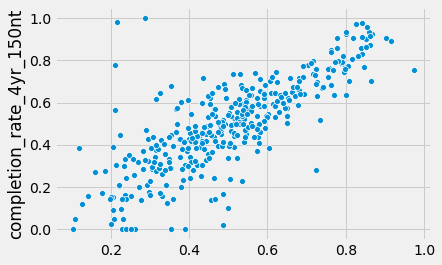

In [50]:
y_pred=model.predict(df4test)
sns.scatterplot(x=y_pred, y=df4test.completion_rate_4yr_150nt)